In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
import folium

import matplotlib
matplotlib.rcParams['font.family']='Malgun Gothic'
matplotlib.rcParams['axes.unicode_minus'] = False

idx = pd.IndexSlice

교보 현재 베스트셀러 : kyobo_best.ipynb
-> 다운 파일 : rank_kyobo.xlsx

교보 현재 베스트셀러 : yes24_best.ipynb
-> 다운 파일 : rank_yes24.xlsx

교보 매월 베스트셀러 : kyobo_month.ipynb
-> 다운 파일 : rank_monthly_kyobo.csv

예스24 매월 베스트셀러 : yes24_month.ipynb
-> 다운 파일 : rank_monthly_yes24.csv

In [99]:
rank_kyobo = pd.read_excel('rank_kyobo.xlsx')
rank_yes24 = pd.read_csv('rank_yes24.csv', encoding='utf-8', thousands=',')
rank_monthly_kyobo = pd.read_csv('rank_monthly_kyobo.csv', encoding='utf-8', thousands=',')
rank_monthly_yes24 = pd.read_csv('rank_monthly_yes24.csv', encoding='utf-8', thousands=',')

In [ ]:
# 교보 현재 베스트셀러
rank_kyobo

,rank,title,author,publisher,publish_date,price,discount,score,site
0,1,최소한의 삼국지,최태성,프런트페이지,2025.11.18,17550,10,9.86,교보문고
1,2,나나 올리브에게,루리,문학동네,2025.11.20,13500,10,9.79,교보문고
2,3,트렌드 코리아 2026,김난도 외,미래의창,2025.09.24,18000,10,9.59,교보문고
3,4,절대 실패 없는 금 투자,배재한,경향BP,2025.11.12,19350,10,9.97,교보문고
4,5,절창,구병모,문학동네,2025.09.17,16200,10,9.51,교보문고
5,6,마일리지 아워,최유나,북로망스,2025.11.26,19800,10,9.80,교보문고
6,7,피지컬 AI 패권 전쟁,박종성,지니의서재,2025.12.05,17820,10,9.38,교보문고
7,8,어른의 행복은 조용하다,태수,페이지2북스,2024.11.04,16020,10,9.47,교보문고
8,9,피크 코리아,백우열,현암사,2025.12.15,20700,10,10.00,교보문고
9,10,어른의 품위,최서영,북로망스,2025.10.01,17550,10,9.52,교보문고


In [ ]:
# yes24 현재 베스트셀러
rank_yes24

,rank,title,author,publisher,publish_date,price,discount,review_cnt,score,site
0,1,무적 LG : V4 달성 기념 화보집,편집부,스포츠서울,2025년11월,39600,10,5,10.0,예스24
1,2,최소한의 삼국지,최태성,프런트페이지,2025년11월,17550,10,31,9.2,예스24
2,3,위대한 응원! 새로운 비상! 한화 이글스,편집부,스포츠서울,2025년11월,39600,10,2,10.0,예스24
3,4,트렌드 코리아 2026,"김난도, 전미영, 최지혜, 권정윤, 한다혜 외 7명",미래의창,2025년09월,18000,10,163,9.2,예스24
4,5,어른의 행복은 조용하다,태수,페이지2북스,2024년11월,16020,10,401,9.5,예스24
5,6,혼모노,성해나,창비,2025년03월,16200,10,674,9.1,예스24
6,7,피크 코리아,백우열,현암사,2025년12월,20700,10,0,0.0,예스24
7,8,박곰희 연금 부자 수업,박곰희,인플루엔셜,2025년06월,18900,10,180,9.7,예스24
8,9,괴테는 모든 것을 말했다,스즈키 유이,리프,2025년11월,15300,10,64,9.7,예스24
9,10,절창 切創,구병모,문학동네,2025년09월,16200,10,188,9.3,예스24


In [101]:
# 교보 월별 베스트셀러
rank_monthly_kyobo

,rank,ym,title,author,publisher,pub_date,discount,price,original_price,point,score,review_cnt,intro,url,site
0,1,202412,트렌드 코리아 2026,김난도 외,미래의창,2025.09.24,10%,18000,"20,000원",1000,9.59,230,"세상은 작용과 반작용, 치열한 정반합(正反合)의 소용돌이가 거세게 휘몰아치고 있다....",https://product.kyobobook.co.kr/detail/S000217...,교보문고
1,2,202412,절창,구병모,문학동네,2025.09.17,10%,16200,"18,000원",900,9.51,427,"더이상의 수식이 필요치 않은 작가, 그 이름이 하나의 브랜드가 된 구병모의 신작 장...",https://product.kyobobook.co.kr/detail/S000217...,교보문고
2,3,202412,다크 심리학,다크 사이드 프로젝트,어센딩,2025.07.31,10%,19710,"21,900원",1090,9.20,515,‘다크 심리학’은 인간 본성의 어두운 면을 탐구하여 타인의 감정을 조종하거나 조작하...,https://product.kyobobook.co.kr/detail/S000217...,교보문고
3,4,202412,위버멘쉬,프리드리히 니체,떠오름(RISE),2025.03.14,10%,16020,"17,800원",890,9.32,373,『위버멘쉬』는 니체가 주장한 ‘초인(Übermensch)’의 철학을 현대적으로 풀어...,https://product.kyobobook.co.kr/detail/S000215...,교보문고
4,5,202412,모순,양귀자,쓰다,2013.04.01,10%,11700,"13,000원",650,9.79,3355,양귀자 소설의 힘을 보여준 베스트셀러 『모순』. 1998년에 초판이 출간된 이후 1...,https://product.kyobobook.co.kr/detail/S000001...,교보문고
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
645,46,202512,가공범,히가시노 게이고,북다,2025.07.21,10%,19800,"22,000원",1100,9.66,389,"히가시노 게이고 작가 데뷔 40주년!\n\n진실을 찾는 눈, 진심을 향한 걸음 \n...",https://product.kyobobook.co.kr/detail/S000217...,교보문고
646,47,202512,결국 너의 시간은 온다,염경엽,웅진지식하우스,2025.11.12,10%,17100,"19,000원",950,10.00,74,"선수·단장·감독으로서 모두 우승을 경험한 KBO 최초의 인물이자, 프로야구 역대 1...",https://product.kyobobook.co.kr/detail/S000218...,교보문고
647,48,202512,쇼펜하우어 인생수업: 한 번뿐인 삶 이렇게 살아라(리커버 에디션),쇼펜하우어,하이스트,2024.02.20,10%,15750,"17,500원",870,9.52,429,"독자들에게 쇼펜하우어의 철학을 쉽게 접근하고 이해할 수 있는 방법을 제공하며,\n그...",https://product.kyobobook.co.kr/detail/S000212...,교보문고
648,49,202512,달러 자산 1억으로 평생 월급 완성하라(2026 투자 전략 특별판),채부심(채상욱),몽스북,2025.08.25,10%,18900,"21,000원",1050,9.45,153,대한민국은 전 세계에서 손꼽히는 ‘재테크 과몰입 사회’다. 아침에 눈을 뜨면 미국 ...,https://product.kyobobook.co.kr/detail/S000217...,교보문고


In [102]:
# yes24 월별 베스트셀러
rank_monthly_yes24

,year,month,rank,title,author,publisher,price,discount,review_cnt,score,site
0,2025,1,1,소년이 온다,한강,창비,13500,10,4537,9.7,예스24
1,2025,1,2,채식주의자,한강,창비,15300,10,1723,9.2,예스24
2,2025,1,3,행동하지 않으면 인생은 바뀌지 않는다,브라이언 트레이시,현대지성,15210,10,368,9.4,예스24
3,2025,1,4,작별하지 않는다,한강,문학동네,15120,10,2474,9.6,예스24
4,2025,1,5,초역 부처의 말,코이케 류노스케,포레스트북스,16020,10,624,9.5,예스24
...,...,...,...,...,...,...,...,...,...,...,...
595,2025,12,46,된다! 하루 만에 끝내는 제미나이 활용법,권서림,이지스퍼블리싱,18000,10,22,10.0,예스24
596,2025,12,47,미술관 여행자를 위한 도슨트 북,카미유 주노,윌북(willbook),29700,10,85,9.2,예스24
597,2025,12,48,어른의 품격을 채우는 100일 필사 노트,김종원,청림Life,18000,10,218,9.8,예스24
598,2025,12,49,코스모스,칼 에드워드 세이건,사이언스북스,19800,10,2180,9.6,예스24


## 1. 기초 시각화: 서점 간 데이터 분포 비교

#### A. 가격/평점 분포 비교 (Box Plot 또는 히스토그램)

시각화: 교보문고와 YES24의 도서 판매가와 평점을 각각 비교하는 **상자 그림 (Box Plot)**을 나란히 그립니다.

In [103]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

# 1. 두 데이터 병합
combined_df = pd.concat([rank_kyobo, rank_yes24], ignore_index=True)
combined_df

,rank,title,author,publisher,publish_date,price,discount,score,site,review_cnt
0,1,최소한의 삼국지,최태성,프런트페이지,2025.11.18,17550,10,9.86,교보문고,NaN
1,2,나나 올리브에게,루리,문학동네,2025.11.20,13500,10,9.79,교보문고,NaN
2,3,트렌드 코리아 2026,김난도 외,미래의창,2025.09.24,18000,10,9.59,교보문고,NaN
3,4,절대 실패 없는 금 투자,배재한,경향BP,2025.11.12,19350,10,9.97,교보문고,NaN
4,5,절창,구병모,문학동네,2025.09.17,16200,10,9.51,교보문고,NaN
...,...,...,...,...,...,...,...,...,...,...
95,46,해커스 토익 기출 VOCA (보카),David Cho,해커스어학연구소,2024년08월,11610,10,9.60,예스24,1166.0
96,47,안녕이라 그랬어,김애란,문학동네,2025년06월,15120,10,9.80,예스24,245.0
97,48,넥서스,유발 하라리,김영사,2024년10월,25020,10,9.20,예스24,389.0
98,49,에그박사 17,에그박사,미래엔아이세움,2025년11월,15120,10,10.00,예스24,7.0


C:\Users\Dell5371\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


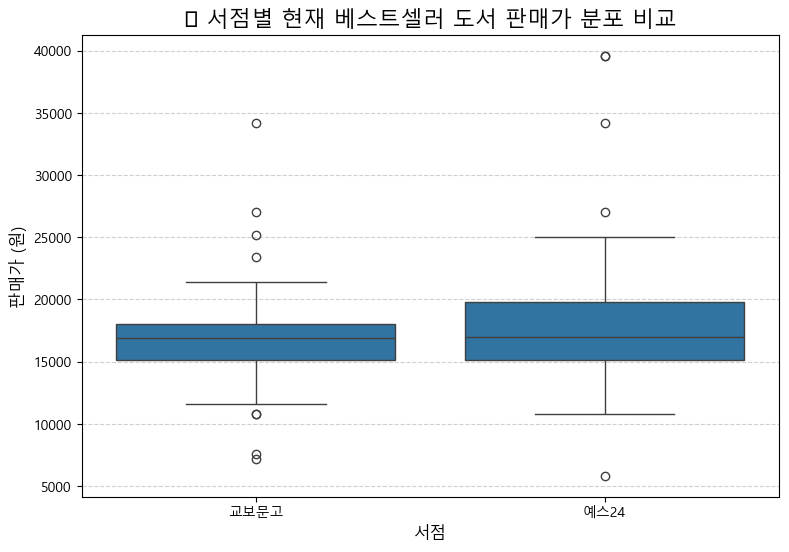

In [104]:
# 첫 번째 시각화: 판매가 분포 비교
plt.figure(figsize=(9, 6))
sb.boxplot(x='site', y='price', data=combined_df)

plt.title('💰 서점별 현재 베스트셀러 도서 판매가 분포 비교', fontsize=16)
plt.xlabel('서점', fontsize=12)
plt.ylabel('판매가 (원)', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.ticklabel_format(style='plain', axis='y')
plt.show()

C:\Users\Dell5371\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 11088 (\N{WHITE MEDIUM STAR}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


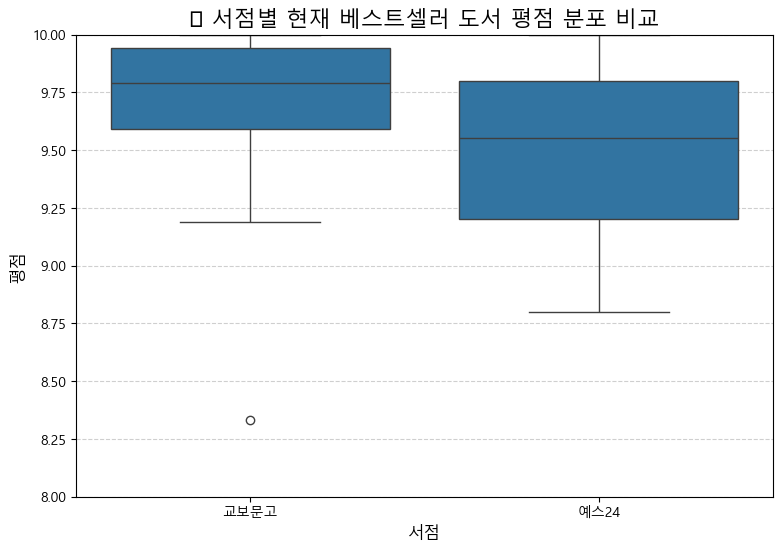

In [105]:
# 두 번째 시각화: 평점 분포 비교
# 평점 데이터는 NaN (평점 없음) 값을 제외하고 시각화합니다.
rating_data = combined_df.dropna(subset=['score'])

plt.figure(figsize=(9, 6))
sb.boxplot(x='site', y='score', data=rating_data)

plt.title('⭐ 서점별 현재 베스트셀러 도서 평점 분포 비교', fontsize=16)
plt.xlabel('서점', fontsize=12)
plt.ylabel('평점', fontsize=12)
plt.ylim(8.0, 10.0) # 평점은 보통 8점 이상이므로 범위 지정
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

#### B. 순위별 가격대 추이 (산점도 또는 꺾은선 그래프)

시각화: X축을 순위로, Y축을 판매가로 설정한 **산점도(Scatter Plot)**를 서점별로 다른 색으로 표시합니다.

인사이트: 순위가 높을수록 가격이 비싸거나(고가 전략), 반대로 순위가 높을수록 가격이 저렴한지(저가 마케팅) 등 순위와 가격의 관계를 파악합니다.

C:\Users\Dell5371\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 10024 (\N{SPARKLES}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


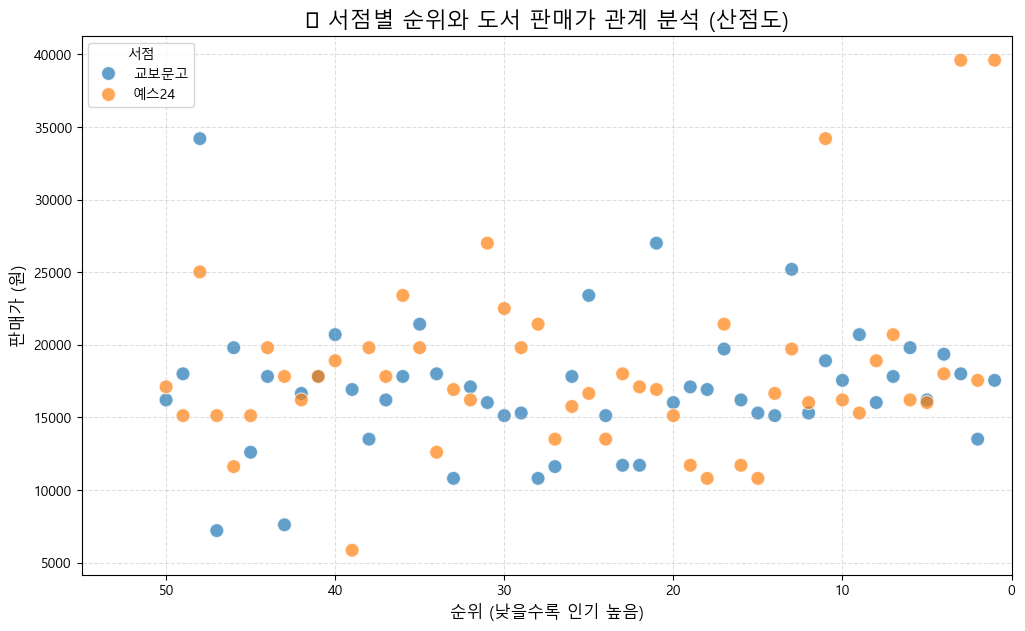

In [106]:
# 3. 산점도 시각화
# combined_df

plt.figure(figsize=(12, 7))
# scatterplot 생성:
# X='순위', Y='판매가(원)', hue='사이트'로 서점별로 색상 구분
sb.scatterplot(
    x='rank', 
    y='price', 
    hue='site', 
    data=combined_df,
    s=100, # 마커 크기
    alpha=0.7 # 투명도
)

plt.title('✨ 서점별 순위와 도서 판매가 관계 분석 (산점도)', fontsize=16)
plt.xlabel('순위 (낮을수록 인기 높음)', fontsize=12)
plt.ylabel('판매가 (원)', fontsize=12)

# 순위는 1위부터 시작하므로 X축 범위를 50위까지 (또는 데이터 최대치) 설정
max_rank = combined_df['rank'].max()
plt.xlim(0, max_rank + 5 if max_rank > 0 else 50) 
plt.gca().invert_xaxis() # 순위를 직관적으로 보기 위해 X축을 반전 (1위가 왼쪽)

plt.legend(title='서점')
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.show()

## 2. 통계 분석: 저자/출판사 영향력

#### A. 출판사 점유율 및 영향력 순위 (막대 그래프)

분석: 전체 베스트셀러 목록에서 가장 많은 도서를 올린 출판사 Top 10을 추출합니다.

시각화: 각 출판사가 교보문고와 YES24에 올린 도서 개수를 누적 막대 그래프로 표현합니다.

인사이트: 특정 출판사(예: A출판사)가 교보문고에서만 압도적으로 강세를 보인다면, 교보문고와 A출판사의 독점적 유통/마케팅 계약 가능성을 유추할 수 있습니다.

In [107]:
# 1. '사이트' 컬럼 추가 및 데이터 병합 (현재 베스트셀러 데이터 사용)
rank_kyobo['site'] = '교보문고'
rank_yes24['site'] = 'YES24'
combined_df = pd.concat([rank_kyobo, rank_yes24], ignore_index=True)

# 'publisher' 컬럼이 문자열이고, 불필요한 공백이 제거되어 있다고 가정합니다.

# 2. 출판사별 도서 개수 계산 (서점 무관 전체 기준)
publisher_counts = combined_df['publisher'].value_counts()

# 3. Top 10 출판사 선정
top_10_publishers = publisher_counts.head(10).index.tolist()

# 4. Top 10 출판사 데이터만 필터링
top_10_df = combined_df[combined_df['publisher'].isin(top_10_publishers)]

# 5. 출판사 및 서점별 도서 개수 교차 집계 (시각화를 위한 형태)
# Pandas의 crosstab 함수를 사용하여 출판사별/서점별 개수를 빠르게 계산합니다.
publisher_site_pivot = pd.crosstab(
    top_10_df['publisher'], 
    top_10_df['site']
).reset_index()

# Top 10 출판사를 전체 도서 개수 순서대로 정렬 (시각화의 일관성 유지)
publisher_site_pivot['Total'] = publisher_site_pivot['교보문고'] + publisher_site_pivot['YES24']
publisher_site_pivot = publisher_site_pivot.sort_values(by='Total', ascending=False)

C:\Users\Dell5371\AppData\Local\Temp\ipykernel_21596\2000846818.py:19: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Malgun Gothic.
  plt.tight_layout()
C:\Users\Dell5371\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128218 (\N{BOOKS}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


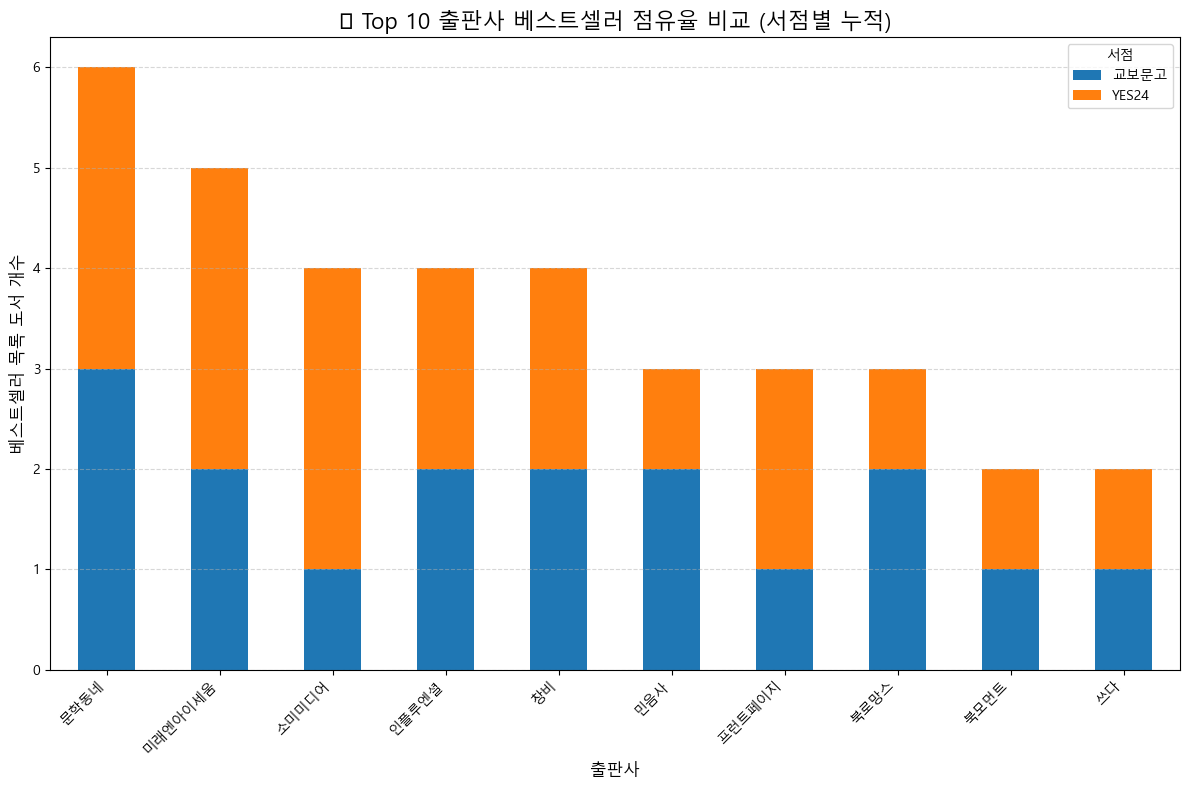

In [108]:
# 6. 누적 막대 그래프 시각화
plt.figure(figsize=(12, 8))

# 출판사 이름과 서점별 개수를 X축/Y축으로 설정
# plot(kind='bar', stacked=True)를 사용하여 누적 막대를 그립니다.
publisher_site_pivot.set_index('publisher')[['교보문고', 'YES24']].plot(
    kind='bar', 
    stacked=True, 
    ax=plt.gca(), # 현재 plt.figure에 플롯을 그립니다.
    color=['#1f77b4', '#ff7f0e'] # 교보문고(파랑), YES24(주황) 색상 지정
)

plt.title('📚 Top 10 출판사 베스트셀러 점유율 비교 (서점별 누적)', fontsize=16)
plt.xlabel('출판사', fontsize=12)
plt.ylabel('베스트셀러 목록 도서 개수', fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='서점', loc='upper right')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

#### B. 저자 영향력 지표 (통계 테이블)

분석: 각 저자별로 평균 순위와 도서 개수를 계산하여 테이블 형태로 정리합니다.

인사이트: 여러 권의 도서를 순위권에 올린 파워 저자를 발굴하고, 그들의 평균 순위를 비교하여 실제 시장 영향력을 정량적으로 평가합니다.

In [109]:
# 1. '사이트' 컬럼 추가 및 데이터 병합 (현재 베스트셀러 데이터 사용)
rank_kyobo['site'] = '교보문고'
rank_yes24['site'] = 'YES24'
combined_df = pd.concat([rank_kyobo, rank_yes24], ignore_index=True)

# 2. 데이터 타입 정리 및 준비
# 'rank' 컬럼을 숫자로 변환 (분석에 필수)
combined_df['rank'] = pd.to_numeric(combined_df['rank'], errors='coerce')

# 3. 저자별 집계
# 여러 권의 도서를 올린 저자(Power Author)를 찾기 위해 그룹화합니다.
author_impact = combined_df.groupby('author').agg(
    도서_개수=('title', 'count'), # 도서 개수 (전체 목록 기준)
    평균_순위=('rank', 'mean'), # 순위의 평균 계산
    최저_순위=('rank', 'min'), # 가장 높은 순위 (숫자가 낮을수록 좋음)
    최고_순위=('rank', 'max'), # 가장 낮은 순위 (숫자가 클수록 안 좋음)
).reset_index()

# 4. 분석 대상 필터링: 베스트셀러 목록에 2권 이상 올린 저자만 필터링
power_authors_df = author_impact[author_impact['도서_개수'] >= 2]

# 5. 평균 순위가 높은(숫자가 낮은) 순서대로 정렬
power_authors_df = power_authors_df.sort_values(by='평균_순위', ascending=True).reset_index(drop=True)

# 6. 보기 쉽도록 컬럼명 변경
power_authors_df.columns = ['저자', '총 도서 개수', '평균 순위', '최고 순위', '최저 순위']

In [110]:
# 기존 DataFrame 생성 및 정렬 코드는 모두 성공했다고 가정

# 7. 결과 출력 (DataFrame 재구성 및 출력)

# 1. 컬럼명 리스트 정의 (출력 순서대로)
columns_for_display = ['저자', '총 도서 개수', '평균 순위', '최고 순위', '최저 순위']

# 2. 결과 출력 DataFrame 생성 (원본 power_authors_df를 사용하여 새 DataFrame 생성)
# 이 과정에서 불필요한 인덱스(0, 1, 2...)가 제거되고, 콘솔 출력이 강화됩니다.
result_df = power_authors_df[columns_for_display].copy()

# 3. 평균 순위의 소수점 자릿수를 보기 좋게 2자리로 포맷팅
result_df['평균 순위'] = result_df['평균 순위'].round(2)

print("===================================================")
print("베스트셀러 Power Author 영향력 지표")
print("===================================================")

result_df

베스트셀러 Power Author 영향력 지표


,저자,총 도서 개수,평균 순위,최고 순위,최저 순위
0,편집부,2,2.00,1,3
1,태수,2,6.50,5,8
2,구병모,2,7.50,5,10
3,백우열,2,8.00,7,9
4,박곰희,2,9.50,8,11
5,스즈키 유이,2,10.50,9,12
6,성해나,2,11.00,6,16
7,루리,2,14.50,2,27
8,다크 사이드 프로젝트,2,15.00,13,17
9,프리드리히 니체,2,16.00,12,20


## 3. 심화 분석

#### 판매가와 평점의 상관관계 : 가격과 만족도 사이의 통계적인 관계를 분석하여 시장의 특성을 파악합니다.

가격 vs. 평점 상관관계 분석분석: 판매가와 평점 간의 **상관 계수 ($r$)**를 계산합니다.

시각화: 가격(X축)과 평점(Y축)을 이용한 산점도를 그리고, 여기에 회귀선을 추가하여 경향성을 시각화합니다.

인사이트: 상관관계가 **음수($r<0$)**라면 가격이 비쌀수록 평점이 낮다는 의미이고, **양수($r>0$)**라면 고가 도서가 품질 만족도도 높다는 의미가 될 수 있습니다.

In [111]:
# 1. '사이트' 컬럼 추가 및 데이터 병합
rank_kyobo['site'] = '교보문고'
rank_yes24['site'] = 'YES24'
combined_df = pd.concat([rank_kyobo, rank_yes24], ignore_index=True)

# 2. 데이터 타입 정리 및 NaN 처리
# 분석에 필요한 price, score를 숫자로 변환합니다. (오류 발생 시 NaN 처리)
combined_df['price'] = pd.to_numeric(combined_df['price'], errors='coerce')
combined_df['score'] = pd.to_numeric(combined_df['score'], errors='coerce')

# 상관관계 분석은 결측치(NaN)를 포함할 수 없으므로, 두 변수가 모두 존재하는 행만 필터링합니다.
correlation_data = combined_df.dropna(subset=['price', 'score'])

# 3. 전체 데이터의 상관 계수 계산
correlation_r = correlation_data['price'].corr(correlation_data['score'])

print("===================================================")
print(f"📊 전체 베스트셀러 데이터의 상관 계수 (r): {correlation_r:.4f}")
print("===================================================")

📊 전체 베스트셀러 데이터의 상관 계수 (r): 0.0976


C:\Users\Dell5371\AppData\Roaming\Python\Python310\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128176 (\N{MONEY BAG}) missing from font(s) Malgun Gothic.
  fig.canvas.print_figure(bytes_io, **kw)


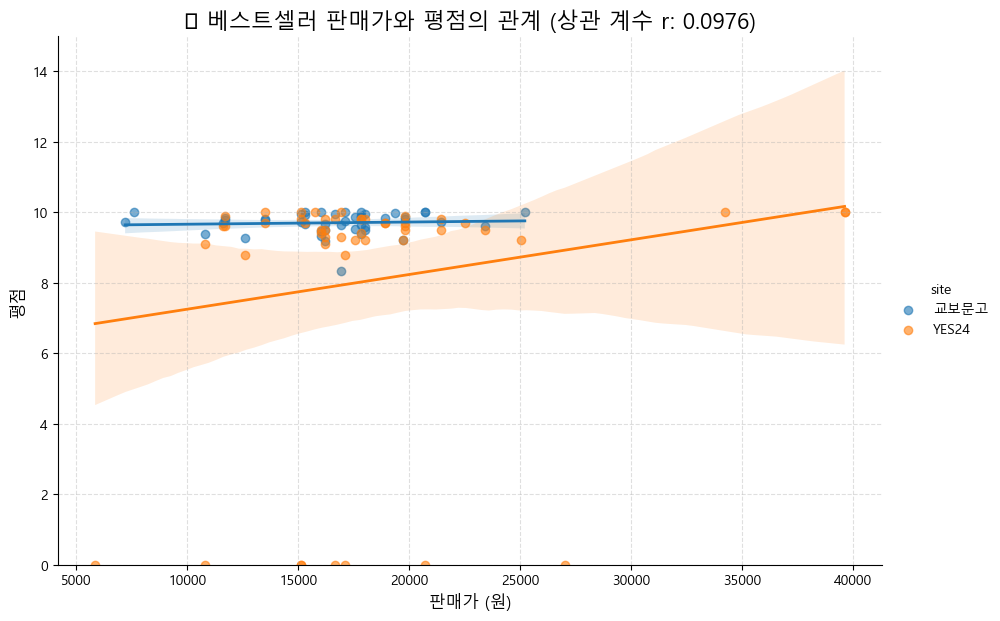


--- 서점별 상관 계수 ---
site
YES24    0.173696
교보문고     0.070419
Name: (price, score), dtype: float64


In [115]:
# 4. 시각화: 산점도와 회귀선 추가 (서점별 분리)

# lmplot 사용: 산점도와 회귀선을 동시에 그림. 'hue'를 사용해 서점별로 분리.
sb.lmplot(
    x='price', 
    y='score', 
    data=correlation_data, 
    hue='site',            # 서점별로 색상 구분 및 개별 회귀선 생성
    height=6, 
    aspect=1.5,
    scatter_kws={'alpha': 0.6}, # 점 투명도 설정
    line_kws={'linewidth': 2}   # 회귀선 두께 설정
)

plt.title(f'💰 베스트셀러 판매가와 평점의 관계 (상관 계수 r: {correlation_r:.4f})', fontsize=16)
plt.xlabel('판매가 (원)', fontsize=12)
plt.ylabel('평점', fontsize=12)
plt.ylim(0.0, 15.0) # 평점 Y축 범위 고정
plt.grid(axis='both', linestyle='--', alpha=0.4)
plt.show()

# 5. 서점별 상관 계수 (선택 사항)
print("\n--- 서점별 상관 계수 ---")
print(correlation_data.groupby('site')[['price', 'score']].corr().unstack().iloc[:, 1])

# 기울기가 양수 : 가격이 비쌀수록 평점도 높아지는 경향  (고가=고품질 만족도)
# 기울기가 음수 : 가격이 비쌀수록 평점이 낮아지는 경향  (고가=불만족)
# 기울기가 거의 0 (평평함): 가격이 평점에 미치는 영향이 미미함.

#### 서점별 순위 일치율 및 차이 분석:

분석: 상위 50위 또는 100위 목록에서 두 서점의 도서 목록이 얼마나 일치하는지, 그리고 일치하는 도서들의 평균 순위 차이는 얼마나 되는지 통계를 냅니다.

인사이트: 순위 차이가 큰 도서를 중심으로 각 서점의 주요 고객층이나 **마케팅 전략(예: 교보문고 주력 프로모션)**의 차이를 유추합니다.

In [116]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 1. 공통 분석 컬럼 추출 및 순위(rank) 숫자 변환
# 오직 'title'과 'rank'만 사용합니다.
kyobo_rank = rank_kyobo[['title', 'rank']].copy()
yes24_rank = rank_yes24[['title', 'rank']].copy()

kyobo_rank['rank'] = pd.to_numeric(kyobo_rank['rank'], errors='coerce')
yes24_rank['rank'] = pd.to_numeric(yes24_rank['rank'], errors='coerce')

# 2. 데이터 병합 (Inner Join으로 공통 도서만 추출)
# 병합 키를 'title' 하나만 사용합니다.
common_books = pd.merge(
    kyobo_rank,
    yes24_rank,
    on=['title'],
    how='inner',
    suffixes=('_kyobo', '_yes24')
).dropna(subset=['rank_kyobo', 'rank_yes24']) # 순위 NaN 값은 제외

# 3. 순위 일치율 및 차이 계산
total_kyobo_books = len(rank_kyobo)
total_yes24_books = len(rank_yes24)
common_count = len(common_books)

smaller_list_size = min(total_kyobo_books, total_yes24_books)
match_rate = (common_count / smaller_list_size) * 100

# 순위 차이 계산 (절대값 순위 차이)
common_books['rank_difference'] = (common_books['rank_kyobo'] - common_books['rank_yes24']).abs()
average_rank_diff = common_books['rank_difference'].mean()

print("=======================================================")
print("📚 서점별 베스트셀러 순위 일치율 및 차이 분석 (제목 기준)")
print("=======================================================")
print(f"총 교보문고 도서 (N): {total_kyobo_books} 권")
print(f"총 YES24 도서 (N): {total_yes24_books} 권")
print(f"✔️ 공통 도서 개수: {common_count} 권")
print(f"✔️ 순위 일치율 (Min N 기준): {match_rate:.2f} %")
print(f"✔️ 공통 도서의 평균 순위 차이 (절댓값): {average_rank_diff:.2f} 위")
print("-------------------------------------------------------")

📚 서점별 베스트셀러 순위 일치율 및 차이 분석 (제목 기준)
총 교보문고 도서 (N): 50 권
총 YES24 도서 (N): 50 권
✔️ 공통 도서 개수: 20 권
✔️ 순위 일치율 (Min N 기준): 40.00 %
✔️ 공통 도서의 평균 순위 차이 (절댓값): 8.90 위
-------------------------------------------------------


In [ ]:
# 1. 순위 차이가 가장 큰 Top 10 도서 추출
diff_top_10 = common_books.sort_values(by='rank_difference', ascending=False).head(10).reset_index(drop=True)

# 2. 결과 출력 DataFrame 생성 및 정리
result_df_diff = diff_top_10[['title', 'rank_kyobo', 'rank_yes24', 'rank_difference']].copy()

# 3. 데이터 타입 및 컬럼명 정리
# 순위 차이를 정수형으로 표시
result_df_diff['rank_difference'] = result_df_diff['rank_difference'].astype(int)

# 보기 쉽게 컬럼명 변경
result_df_diff.columns = ['도서명', '교보 순위', 'YES24 순위', '순위 차이']


print("=======================================================")
print("📈 순위 차이가 가장 큰 Top 10 도서 목록")
print("=======================================================")

result_df_diff

📈 순위 차이가 가장 큰 Top 10 도서 목록


,도서명,교보 순위,YES24 순위,순위 차이
0,너를 아끼며 살아라,42,14,28
1,나나 올리브에게,2,27,25
2,마일리지 아워,6,29,23
3,소년이 온다,38,24,14
4,급류,45,34,11
5,머니 트렌드 2026,25,36,11
6,혼모노,16,6,10
7,자몽살구클럽,28,18,10
8,위버멘쉬,20,12,8
9,단 한 줄만 내 마음에 새긴다고 해도,35,28,7


#### 도서의 생명주기(Life Cycle) 분석:

분석: 특정 도서가 베스트셀러에 진입한 날짜부터 탈락할 때까지의 기간(생명주기)을 측정하고, 카테고리별 평균 생명주기를 통계 냅니다.

인사이트: 소설은 비교적 짧고, 자기계발이나 재테크 서적은 오래 머무는 등, 장르별 스테디셀러 특성을 파악할 수 있습니다.

#### 월별 카테고리 트렌드 변화:

분석: 확보한 월별 베스트셀러 데이터를 바탕으로, 특정 월에 강세를 보이는 카테고리 변화를 통계 냅니다. (예: 1월은 자기계발, 여름 방학은 소설/에세이, 시험 기간은 수험서 등)

인사이트: 계절적 요인이나 **사회적 이슈(키워드)**가 도서 판매에 미치는 영향을 수치로 확인합니다.

#### 신간 효과 측정:

분석: 출간일이 최근 3개월 이내인 도서들이 베스트셀러 목록에 얼마나 빠르게 진입하고, 얼마나 오래 머무는지 비율을 통계 냅니다.

인사이트: 시장이 신간에 얼마나 민감한지, 혹은 스테디셀러 중심인지 판단할 수 있습니다.